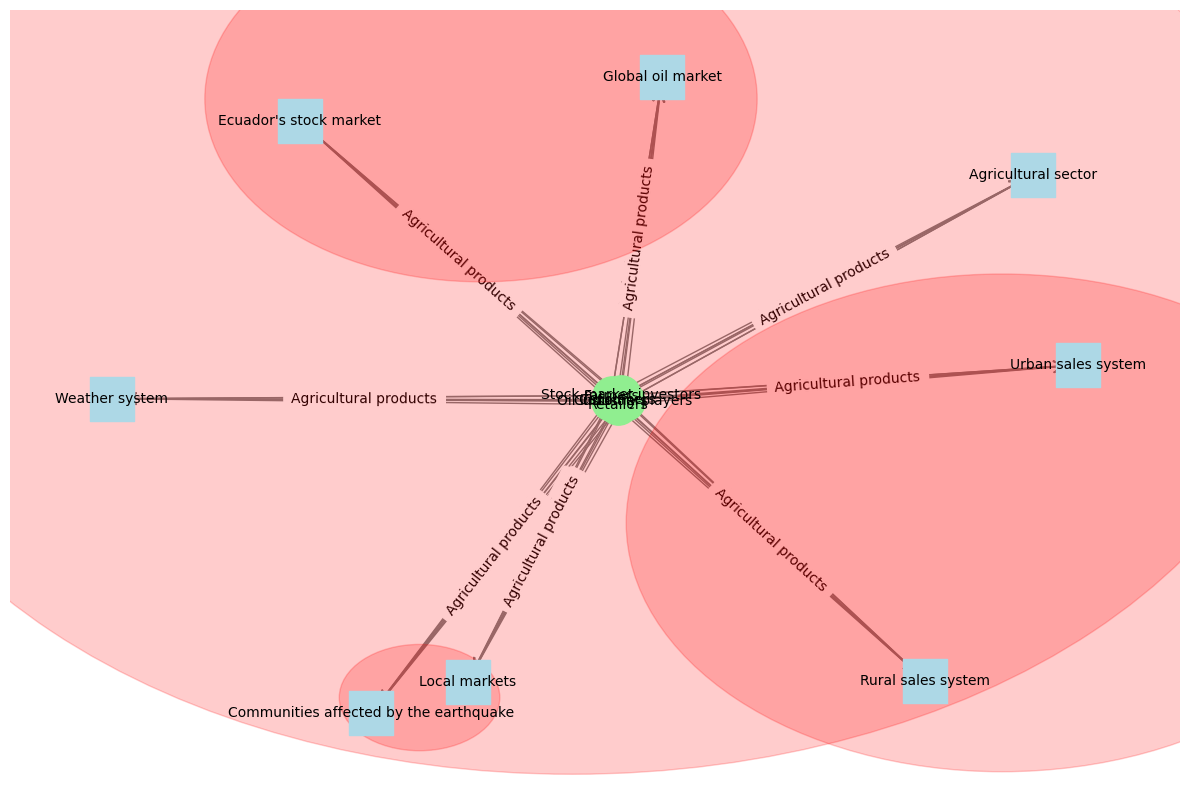

Hypothesis 1:
Hypothesis: The metacoupled system of Ecuador's economy exhibits complex interactions and feedbacks between various subsystems, flows, agents, causes, and effects, resulting in dynamic responses to natural disasters and global market forces.
Systems: Ecuador's stock market, Global oil market, Rural sales system, Urban sales system, Local markets, Communities affected by the earthquake, Agricultural sector, Weather system
Flows: Financial capital, Financial capital, Money, goods, and services, Sales transactions, Changes in demand for goods and services, Agricultural products
Agents: Stock market investors, Oil industry players, Retailers, Customers, Farmers, Consumers
Causes: 
Effects: 



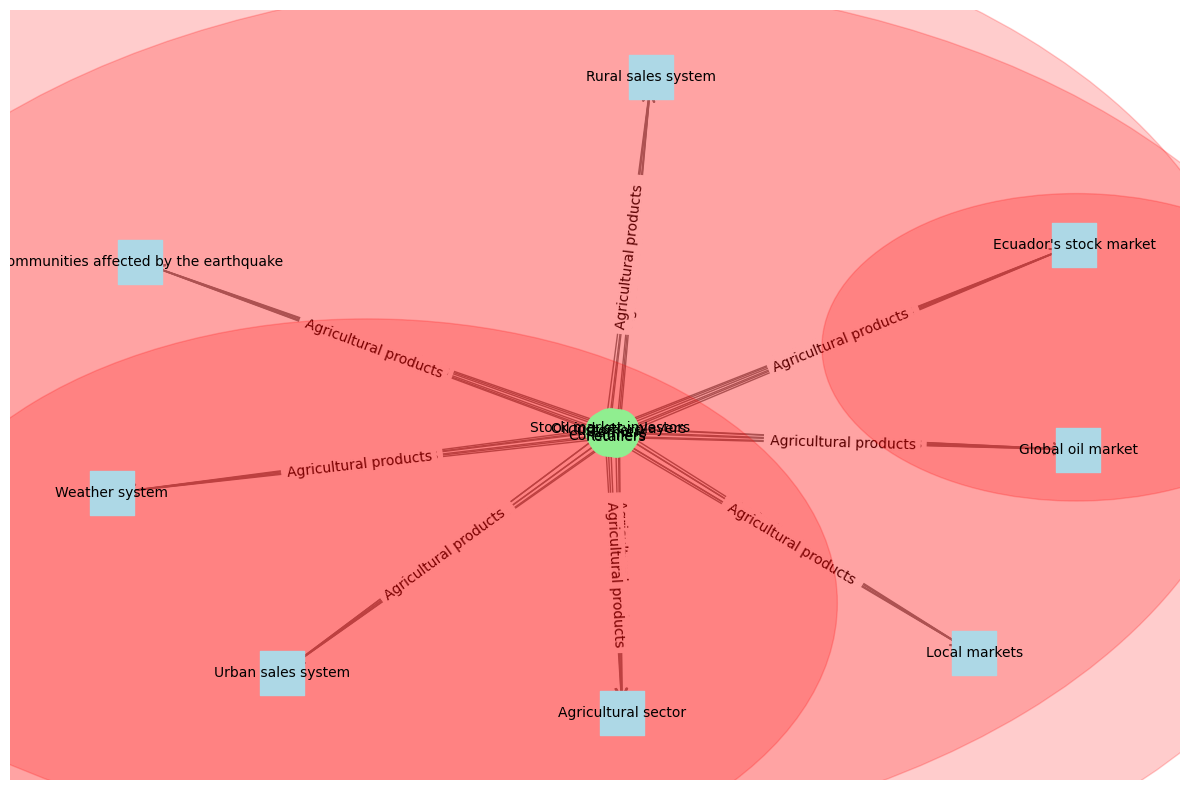

Testing hypothesis: The metacoupled system of Ecuador's economy exhibits complex interactions and feedbacks between various subsystems, flows, agents, causes, and effects, resulting in dynamic responses to natural disasters and global market forces.
                            OLS Regression Results                            
Dep. Variable:             Last Price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                 2.011e+06
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:31:29   Log-Likelihood:                -34166.
No. Observations:             2017224   AIC:                         6.834e+04
Df Residuals:                 2017221   BIC:                         6.838e+04
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [2]:
from metacouplingpackagewithnetwork import MetacouplingFramework, TelecouplingComponent, TelecouplingHypothesis
import pandas as pd
import numpy as np

# Load your data
file_path = 'sales_weather_stock.csv'  # Modify with the correct path to your file
data = pd.read_csv(file_path)

# Convert 'date' to datetime type
data['date'] = pd.to_datetime(data['date'])

# Define the date of the earthquake
earthquake_date = pd.Timestamp('2016-04-16')

# Prepare the Data
data['post_earthquake'] = (data['date'] > pd.Timestamp('2016-04-16')).astype(int)
data['post_disaster'] = (data['date'] > '2016-04-16').astype(int)
data['agricultural_sales'] = data.loc[data['family'] == 'GROCERY I', 'sales']

# Categorize urban/rural based on city
urban_rural_dict = {
    'Quito': 'urban',
    'Guayaquil': 'urban',
    'Cuenca': 'urban',
    # Add more cities as needed
}
data['urban_rural'] = data['city'].map(urban_rural_dict).fillna('rural')
data['urban_rural'] = data['urban_rural'].map({'urban': 1, 'rural': 0})

# Create Telecoupling Components
systems = [
    TelecouplingComponent("Ecuador's stock market"),
    TelecouplingComponent("Global oil market"),
    TelecouplingComponent("Rural sales system"),
    TelecouplingComponent("Urban sales system"),
    TelecouplingComponent("Local markets"),
    TelecouplingComponent("Communities affected by the earthquake"),
    TelecouplingComponent("Agricultural sector"),
    TelecouplingComponent("Weather system")
]

flows = [
    TelecouplingComponent("Financial capital"),
    TelecouplingComponent("Financial capital"),
    TelecouplingComponent("Money, goods, and services"),
    TelecouplingComponent("Sales transactions"),
    TelecouplingComponent("Changes in demand for goods and services"),
    TelecouplingComponent("Agricultural products")
]

agents = [
    TelecouplingComponent("Stock market investors"),
    TelecouplingComponent("Oil industry players"),
    TelecouplingComponent("Retailers"),
    TelecouplingComponent("Customers"),
    TelecouplingComponent("Farmers"),
    TelecouplingComponent("Consumers")
]

# Create the Metacoupled System Hypothesis
metacoupled_hypothesis = TelecouplingHypothesis(
    "The metacoupled system of Ecuador's economy exhibits complex interactions and feedbacks between various subsystems, flows, agents, causes, and effects, resulting in dynamic responses to natural disasters and global market forces.",
    systems, flows, agents, [], []
)

# Create Metacoupling Framework and Add Hypothesis
framework = MetacouplingFramework()
framework.add_hypothesis(metacoupled_hypothesis)

# Display the Metacoupled Hypothesis
framework.display_hypotheses()

# Visualize the Metacoupling Network Diagram
framework.visualize_metacoupling_network(metacoupled_hypothesis)

# Test the Metacoupled Hypothesis
framework.test_hypotheses(data)